In [1]:
import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with rs.open('./data/NLDAS_FORA0125_H.A19790101.1600.002.grb.TP.tiff','r') as ds:
    dat = ds.read(1)
    params = ds.profile

In [3]:
params

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': 9999.0,
 'width': 464,
 'height': 224,
 'count': 2,
 'crs': CRS({'proj': 'longlat', 'a': 6371200, 'b': 6371200, 'no_defs': True}),
 'transform': (-125.0005, 0.125, 0.0, 53.0005, 0.0, -0.12500000000000003),
 'affine': Affine(0.125, 0.0, -125.0005,
        0.0, -0.12500000000000003, 53.0005),
 'tiled': False,
 'interleave': 'pixel'}

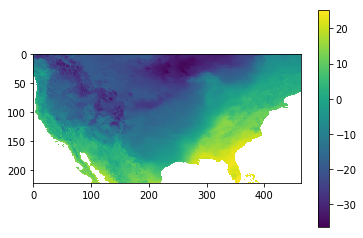

In [4]:
dat[dat == 9999] = np.NaN 
plt.imshow(dat)
plt.colorbar()

In [5]:
n,m = np.shape(dat)

In [6]:
idx = np.reshape(np.arange(1,(n*m)+1),(n,m))

In [7]:
idx.max()

103936

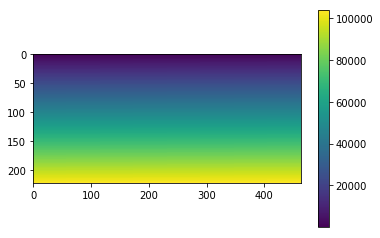

In [8]:
plt.imshow(idx)
plt.colorbar()

In [9]:
idx.dtype=np.int32

In [10]:
params.update({'dtype':'int32', 'nodata':-9999})

In [11]:
params

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': -9999,
 'width': 464,
 'height': 224,
 'count': 2,
 'crs': CRS({'proj': 'longlat', 'a': 6371200, 'b': 6371200, 'no_defs': True}),
 'transform': (-125.0005, 0.125, 0.0, 53.0005, 0.0, -0.12500000000000003),
 'affine': Affine(0.125, 0.0, -125.0005,
        0.0, -0.12500000000000003, 53.0005),
 'tiled': False,
 'interleave': 'pixel'}

In [12]:
outfl = './data/NLDASv2_idx_125.tiff'
with rs.open(outfl,'w',**params) as dst:
    dst.write(idx,1)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [13]:
idx.max()

103936

In [14]:
with rs.open('./data/NLDASv2_idx_0125.tiff','r') as ds:
    newIDX = ds.read(1)

In [15]:
newIDX.shape

(2240, 4640)

In [17]:
idx.shape

(224, 928)

In [18]:
newIDX.dtype

dtype('int32')